## 1. 라이브러리 및 데이터 불러오기

In [33]:
# 전처리
import pandas as pd
import numpy as np


# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')




# plt 테마 설정 
plt.style.use(['seaborn-white'])

plt.rc('font', family='AppleGothic')

# 맥 폰트 
plt.rcParams['axes.unicode_minus'] = False


# 데이터셋 분할 & 교차검증 & 하이퍼파라미터 튜닝 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# 데이터 전처리 (인코딩, 표준화, 정규화)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델링
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# 성능지표 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

- 윈도우

In [34]:
# 학습용 데이터 불러오기
train_data = pd.read_csv('C:/Users/Innovation/Desktop/김동요/jupyter/인공지능/과제 4/train.csv')

# 테스트용 데이터 불러오기 
test_data = pd.read_csv('C:/Users/Innovation/Desktop/김동요/jupyter/인공지능/과제 4/test.csv')

# 제출용 데이터 불러오기 
submission_data = pd.read_csv('C:/Users/Innovation/Desktop/김동요/jupyter/인공지능/과제 4/submission.csv')

### 1) 데이터 확인

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
print('train_data shape : {}'.format(train_data.shape))
print('train_data의 결측치 : {}'.format(sum(train_data.isna().sum())))
print('test_data shape : {}'.format(test_data.shape))
print('test_data의 결측치 : {}'.format(sum(test_data.isna().sum())))

train_data shape : (1460, 81)
train_data의 결측치 : 6965
test_data shape : (1459, 80)
test_data의 결측치 : 7000


- train_data는 행이 1460개이며, test_data는 행이 1459개이다. 
- train_data의 결측값들은 총 6965개이며, test_data의 결측값들은 총 7000개이다.

In [11]:
train_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [12]:
print(f'train_data 중복값: {train_data.duplicated().sum()}, ({np.round(100*train_data.duplicated().sum()/len(train_data),1)}%)')
print('')
print(f'test_data 중복값: {test_data.duplicated().sum()}, ({np.round(100*test_data.duplicated().sum()/len(test_data),1)}%)')

train_data 중복값: 0, (0.0%)

test_data 중복값: 0, (0.0%)


- train_data와 test_data 모두 중복된 key 값(인덱스)이 없다는 것을 확인하였다. 

In [13]:
# 변수명 및 변수타입 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
numerical_feats = list(train_data.dtypes[train_data.dtypes != "object"].index)

print('Dataset의 수치형 변수는 총 {}개 입니다.'.format(len(numerical_feats)))


cat_feats = list(train_data.dtypes[train_data.dtypes == "object"].index)

print('Dataset의 범주형 변수는 총 {}개 입니다.'.format(len(cat_feats)))

Dataset의 수치형 변수는 총 38개 입니다.
Dataset의 범주형 변수는 총 43개 입니다.


- train_data에는 총 80개의 변수가 존재하며, 수치형 변수는 38개, 범주형 변수는 43개로 구성되어 있다. 

## 2. EDA(탐색적 데이터 분석)

### 1) 기술 통계량 확인

In [21]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
# 타겟 변수의 가격 
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- 분산과 표준편차가 크다는 것을 알 수 있으며, 분포가 한쪽으로 치우쳐져 있다.
- 로그변환을 해줄 필요가 있다.

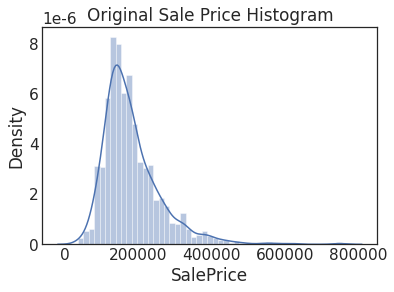

In [19]:
sns.distplot(train_data['SalePrice'])
plt.title('Original Sale Price Histogram')
plt.show()

### 2) 수치형 변수

- 또한 타겟 변수를 제외한 수치형 변수 중 어느 것도 정규 분포의 모습을 보이지 않으므로 다른 수치형 변수들도 변환해주어야 한다.

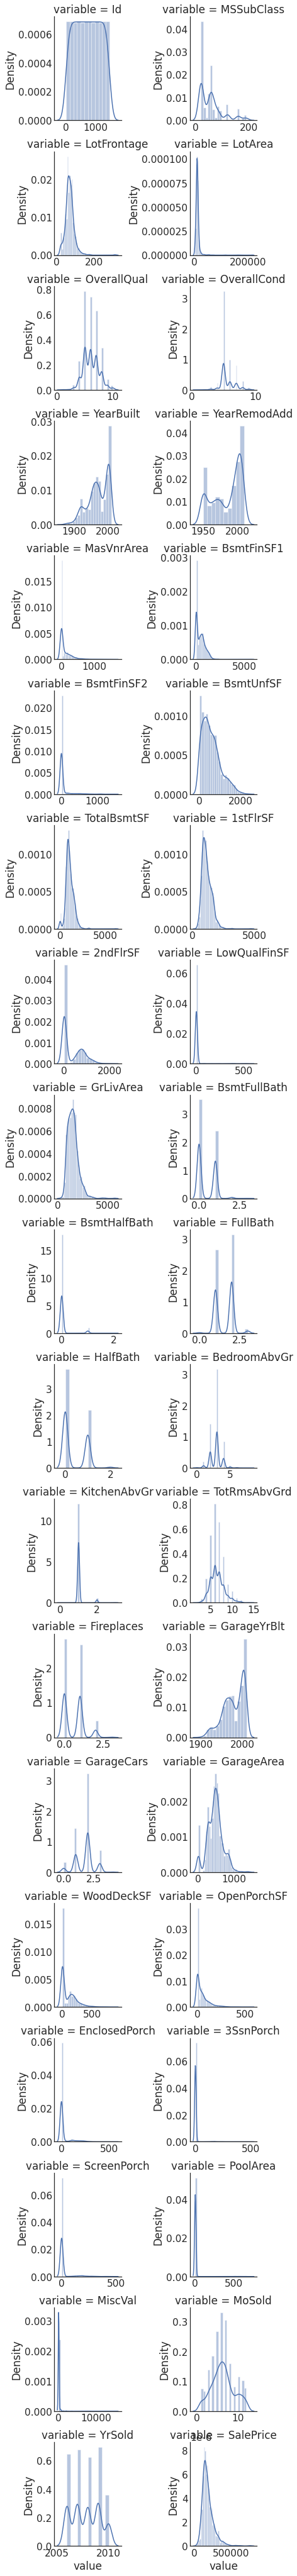

In [27]:
# 다른 수치형 변수들도 확인
f = pd.melt(train_data, value_vars=numerical_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

- TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea 등 일부 독립 변수는 로그 변환을 해야할 필요가 보인다 .

### 2. 범주형 변수

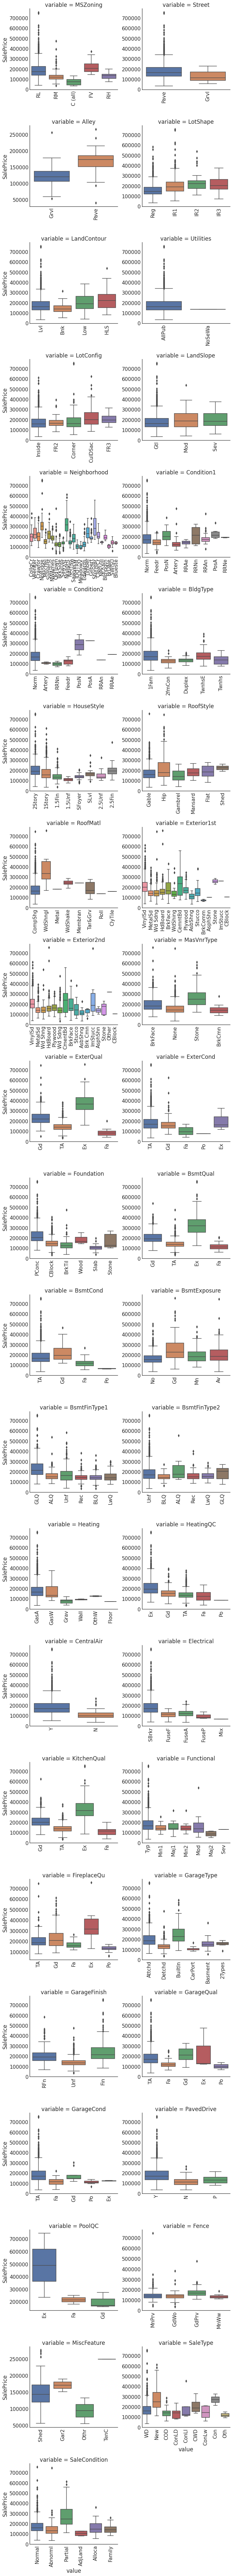

In [35]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=cat_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

- 이웃은 집값은 타겟 변수에(집값) 큰 영향을 미친다는 것으 알 수 있다. 
- 또한, 재산에 수영장이 있으면 가격이 상당히 증가하는 것을 알  수 있다.

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in